In [3]:
from get_common_sp500_stock_tickers import get_common_sp500_stock_tickers

In [4]:
from datetime import date
from dateutil.relativedelta import relativedelta
import numpy as np
import pandas as pd

from envs import QUANDL_ACCESS_TOKEN
import quandl
from time import sleep
import random
quandl.ApiConfig.api_key = QUANDL_ACCESS_TOKEN


n_year=5
end_date = date.today()
start_date = end_date - relativedelta(years=n_year)
common_sp500_tickers = get_common_sp500_stock_tickers(start_date,end_date)
common_sp500_tickers = [x.replace(".","_") for x in common_sp500_tickers]

In [6]:
def download_stock(args):
    stock, start_date, end_date = args
    sleep(random.randint(0,1500)/1000)
    try:
#         print(stock)
        output_name = stock + '_data.csv'
        stock_df = quandl.get('WIKI/'+ stock, start_date=start_date.strftime('%Y-%m-%d'), end_date=end_date.strftime('%Y-%m-%d'))
        stock_df.to_csv(output_name)
        return ''
    except Exception as e: 
        bad_names.append(stock)
        print('bad: {}, {}'.format(stock, e))   
        return stock

In [7]:
from datetime import datetime
from multiprocessing import Pool, Array
from itertools import repeat
import tqdm


now_time = datetime.now()
bad_names =[] #to keep track of failed queries

max_workers = 10

workers = min(max_workers, len(common_sp500_tickers)) #in case a smaller number of stocks than threads was passed in
p = Pool(max_workers)
bad_names = list(tqdm.tqdm(p.imap_unordered(download_stock, zip(common_sp500_tickers, repeat(start_date), repeat(end_date))), total=len(common_sp500_tickers)))



""" Save failed queries to a text file to retry """
if len(bad_names) > 0:
    with open('failed_queries.txt','w') as outfile:
        for name in bad_names:
            outfile.write(name+'\n')

#timing:
finish_time = datetime.now()
duration = finish_time - now_time
minutes, seconds = divmod(duration.seconds, 60)
print('getSandP_threaded.py')
print(f'The threaded script took {minutes} minutes and {seconds} seconds to run.')
#The threaded script took 0 minutes and 31 seconds to run.

 17%|█▋        | 67/393 [00:25<01:28,  3.66it/s]

bad: CPRI, (Status 404) (Quandl Error QECx02) You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.


 50%|████▉     | 196/393 [01:05<00:49,  4.02it/s]

bad: JEF, (Status 404) (Quandl Error QECx02) You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.


 55%|█████▍    | 215/393 [01:12<00:55,  3.20it/s]

bad: LIN, (Status 404) (Quandl Error QECx02) You have submitted an incorrect Quandl code. Please check your Quandl codes and try again.


100%|██████████| 393/393 [02:15<00:00,  1.83it/s]

getSandP_threaded.py
The threaded script took 2 minutes and 15 seconds to run.


In [5]:
import glob
csv_files = glob.glob('*_data.csv')
file = csv_files[0]
df= pd.read_csv(csv_files[0])[['Date', 'Adj. Close']]
df.columns = ['Date', file.split('_')[0]]
for f in csv_files[1:]:
#     df = pd.merge(df, pd.read_csv(f)[['Date', 'Adj. Close']], how='inner', on='Date')
#     print(df.shape)
    df_ = pd.read_csv(f)[['Date', 'Adj. Close']]
    df_.columns = ['Date', f.split('_')[0]]
    if df_.shape[0]>=990:
        df = pd.merge(df, df_, how='left', on='Date')
    else:
        print('skip {} as the shape of the data is ({}, {}), which is less that 995 data point'.format(f.split('_')[0], df_.shape[0], df_.shape[1]))

df = df.set_index('Date') 

skip SPGI as the shape of the data is (481, 2), which is less that 995 data point
skip WRK as the shape of the data is (694, 2), which is less that 995 data point
skip TPR as the shape of the data is (100, 2), which is less that 995 data point
skip DWDP as the shape of the data is (141, 2), which is less that 995 data point
skip BHGE as the shape of the data is (181, 2), which is less that 995 data point
skip IQV as the shape of the data is (90, 2), which is less that 995 data point
skip TRV as the shape of the data is (231, 2), which is less that 995 data point
skip APTV as the shape of the data is (74, 2), which is less that 995 data point
skip PPG as the shape of the data is (231, 2), which is less that 995 data point
skip CBRE as the shape of the data is (4, 2), which is less that 995 data point
skip MMM as the shape of the data is (914, 2), which is less that 995 data point
skip WELL as the shape of the data is (14, 2), which is less that 995 data point
skip BKNG as the shape of t

In [7]:
print(df.isnull().values.sum())
df.head()

14


,XRX,GS,MTB,V,CTAS,APH,BBT,RHI,HD,PEP,...,NKE,HAL,CERN,SJM,WY,WFC,QCOM,COF,COG,F
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-14,41.508942,147.558327,111.858887,48.989583,53.704614,44.146049,34.920348,37.657543,70.504615,75.634459,...,34.722893,55.649812,52.87,87.373415,24.427920,43.229405,70.117346,69.191375,32.266936,13.047057
2014-04-15,41.362655,147.729973,111.433110,49.730483,53.733226,44.213802,35.199064,37.770262,70.430370,76.005616,...,34.674920,56.488139,53.97,87.089467,24.314057,43.831436,70.427443,69.621135,32.473776,13.163400
2014-04-16,42.057519,149.923227,112.590112,51.024621,54.324540,45.191384,35.369889,38.981992,71.070731,76.738876,...,35.068299,56.987367,53.98,88.692397,24.436679,44.109987,71.038777,70.219062,33.537521,13.354535
2014-04-17,41.801516,150.133017,112.497551,50.680980,54.963540,45.549508,34.102184,39.620733,71.544041,77.444979,...,35.514449,57.364143,54.00,88.573322,24.410403,43.966219,72.048807,69.966812,34.394427,13.296364
2014-04-21,41.947803,150.476309,112.155079,50.968566,54.734644,45.665656,33.985303,39.658306,72.351452,77.770873,...,35.452084,59.266862,54.11,88.600801,24.699439,44.136944,71.703271,70.116293,34.591417,13.279743


In [10]:
pct_df = df.pct_change(fill_method='ffill')
pct_df = pct_df.iloc[1:]
print(pct_df.isnull().values.sum())
pct_df.head()

0


,XRX,GS,MTB,V,CTAS,APH,BBT,RHI,HD,PEP,...,NKE,HAL,CERN,SJM,WY,WFC,QCOM,COF,COG,F
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-15,-0.003524,0.001163,-0.003806,0.015124,0.000533,0.001535,0.007981,0.002993,-0.001053,0.004907,...,-0.001382,0.015064,0.020806,-0.003250,-0.004661,0.013926,0.004423,0.006211,0.006410,0.008917
2014-04-16,0.016799,0.014846,0.010383,0.026023,0.011005,0.022110,0.004853,0.032082,0.009092,0.009647,...,0.011345,0.008838,0.000185,0.018406,0.005043,0.006355,0.008680,0.008588,0.032757,0.014520
2014-04-17,-0.006087,0.001399,-0.000822,-0.006735,0.011763,0.007925,-0.035841,0.016386,0.006660,0.009201,...,0.012722,0.006612,0.000371,-0.001343,-0.001075,-0.003259,0.014218,-0.003592,0.025551,-0.004356
2014-04-21,0.003500,0.002287,-0.003044,0.005674,-0.004164,0.002550,-0.003427,0.000948,0.011286,0.004208,...,-0.001756,0.033169,0.002037,0.000310,0.011841,0.003883,-0.004796,0.002136,0.005727,-0.001250
2014-04-22,0.010462,0.016857,0.006437,0.004017,0.007144,0.006889,0.008201,0.018238,0.021934,-0.008963,...,0.006089,0.007311,-0.007392,0.002068,0.008865,0.002239,-0.003954,0.000799,0.015091,0.007509


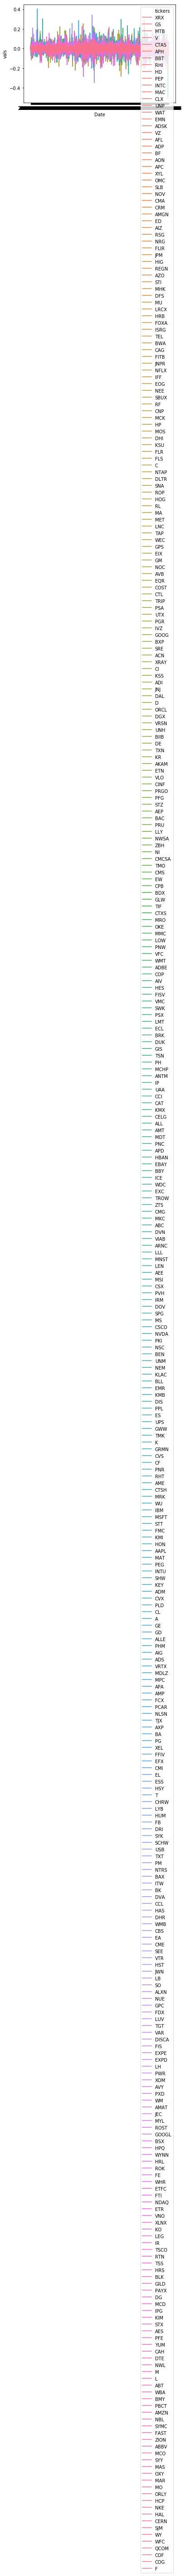

In [15]:
import seaborn as sns
pct_df['Date'] = pct_df.index
sns.lineplot(data=pct_df.melt('Date', var_name='tickers', value_name='vals'), x='Date', y='vals', hue='tickers')

In [16]:
pct_df.to_csv('sp500_pct.csv')